# CIFAR-10 and Fashion-MNIST datasets

_24 July 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

These are the first runs I tried on the CIFAR-10 and Fashion-MNIST datasets, just to see what would happen. Pretty simple models, so not expecting much.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_comparison, show_timestamp_info

In [2]:
analog_path = Path("../results-downloaded/20210724-other-datasets-dynpower/")
show_timestamp_info(analog_path)

/home/czlee/jadeite/jupyter/plots_utils.py:123: UserWarning: No evaluation.json file in ../results-downloaded/20210724-other-datasets-dynpower/20210724-180131/clients-20-noise-0.001-iteration-7
  warnings.warn(f"No evaluation.json file in {directory}")
/home/czlee/jadeite/jupyter/plots_utils.py:123: UserWarning: No evaluation.json file in ../results-downloaded/20210724-other-datasets-dynpower/20210724-180145/clients-20-noise-1e-06-iteration-7
  warnings.warn(f"No evaluation.json file in {directory}")
/home/czlee/jadeite/jupyter/plots_utils.py:123: UserWarning: No evaluation.json file in ../results-downloaded/20210724-other-datasets-dynpower/20210724-180115/clients-20-noise-1.0-iteration-7
  warnings.warn(f"No evaluation.json file in {directory}")


| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Jul 2021, 19:34:11** | 23 Jul 2021, 20:12:29 | 38 min 18 s |
| last to finish | 24 Jul 2021, 22:04:57 | **24 Jul 2021, 22:41:44** | 36 min 47 s |
| shortest | 24 Jul 2021, 03:36:00 | 24 Jul 2021, 03:58:07 | **22 min 07 s** |
| longest | 24 Jul 2021, 19:22:44 | 24 Jul 2021, 20:03:23 | **40 min 39 s** |


In [3]:
digital_path = Path("../results-downloaded/20210724-other-datasets-dynquant/")
show_timestamp_info(digital_path)

/home/czlee/jadeite/jupyter/plots_utils.py:123: UserWarning: No evaluation.json file in ../results-downloaded/20210724-other-datasets-dynquant/20210724-175852/clients-20-noise-0.001-iteration-7
  warnings.warn(f"No evaluation.json file in {directory}")
/home/czlee/jadeite/jupyter/plots_utils.py:123: UserWarning: No evaluation.json file in ../results-downloaded/20210724-other-datasets-dynquant/20210724-175628/clients-20-noise-1e-06-iteration-8
  warnings.warn(f"No evaluation.json file in {directory}")
/home/czlee/jadeite/jupyter/plots_utils.py:123: UserWarning: No evaluation.json file in ../results-downloaded/20210724-other-datasets-dynquant/20210724-175918/clients-20-noise-1.0-iteration-7
  warnings.warn(f"No evaluation.json file in {directory}")


| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Jul 2021, 19:33:59** | 23 Jul 2021, 20:12:03 | 38 min 04 s |
| last to finish | 24 Jul 2021, 22:30:48 | **24 Jul 2021, 23:07:07** | 36 min 19 s |
| shortest | 24 Jul 2021, 05:32:29 | 24 Jul 2021, 05:55:31 | **23 min 02 s** |
| longest | 24 Jul 2021, 20:06:20 | 24 Jul 2021, 20:48:55 | **42 min 35 s** |


In [4]:
def get_comparison_args(dataset, clients, lr_client=0.01, momentum_client=0.0):
    common_fixed_specs = {
        'rounds': 150,
        'batch_size': 64,
        'epochs': 1,
        'ema_coefficient': 1 / 3,
        'data_per_client': None,
    }

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'power_update_period': 1,
        'power_quantile': 0.9,
        'power_factor': 0.9,
    })
    title_specs = {
        'power': 1.0,
        'dataset': dataset,
        'clients': clients,
        'send': 'deltas',
        'momentum_client': momentum_client,
        'lr_client': lr_client,
    }
    series_specs = {
        'noise': '__all__',
    }
    all_analog_specs = title_specs, fixed_specs, series_specs

    fixed_specs = common_fixed_specs.copy()
    fixed_specs.update({
        'qrange_update_period': 1,
        'qrange_param_quantile': 0.9,
        'qrange_client_quantile': 0.9,
        'channel_uses': None,
        'rounding_method': 'stochastic',
        'zero_bits_strategy': 'read-zero',
    })

    all_digital_specs = title_specs, fixed_specs, series_specs
    
    return all_analog_specs, all_digital_specs

In [5]:
# turn on or off for all plots
plot_range = False

# CIFAR-10

I think this requires a lot more tuning or a better model. I wouldn't trust these results as a representation of what happens when CIFAR-10 is set up properly. Notice that the $n = 5$ plots flatten out and then go down slightly.

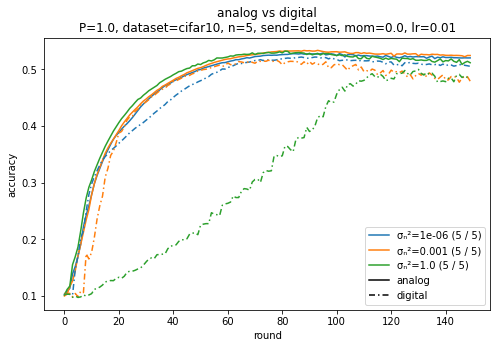

In [6]:
all_specs = get_comparison_args('cifar10', 5)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=plot_range)

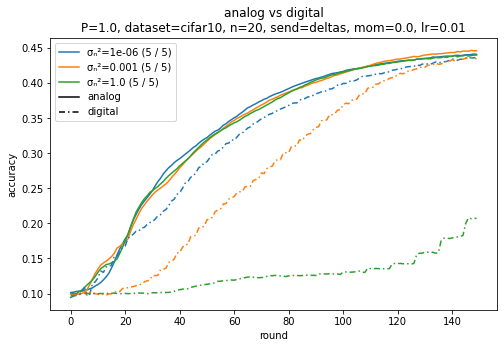

In [7]:
all_specs = get_comparison_args('cifar10', 20)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=plot_range)

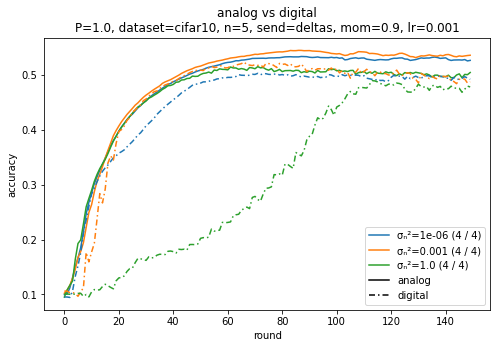

In [8]:
all_specs = get_comparison_args('cifar10', 5, lr_client=1e-3, momentum_client=0.9)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=plot_range)

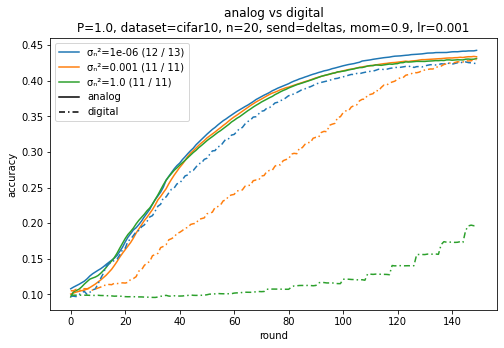

In [9]:
all_specs = get_comparison_args('cifar10', 20, lr_client=1e-3, momentum_client=0.9)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=plot_range)

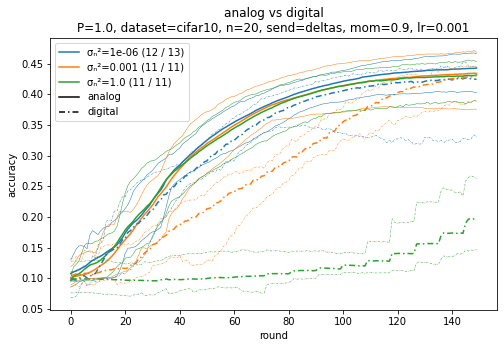

In [10]:
all_specs = get_comparison_args('cifar10', 20, lr_client=1e-3, momentum_client=0.9)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=True)

# Fashion-MNIST

This actually went okay, but there's loads of variance and I don't know that I'd trust these results without running a ton more iterations.

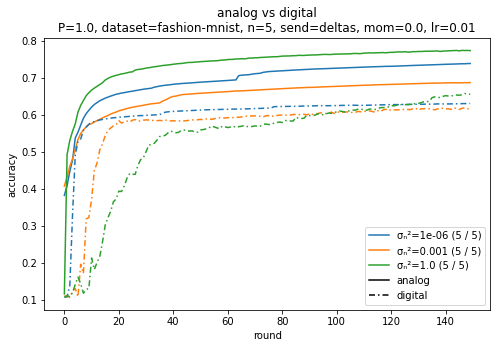

In [11]:
all_specs = get_comparison_args('fashion-mnist', 5)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=plot_range)

Though, it's a bit strange that in this plot, the $\sigma_\mathrm{n}^2 = 10^{-6}$ case performed worse than lower noise levels.

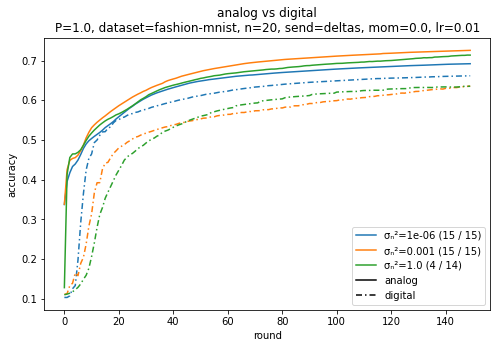

In [12]:
all_specs = get_comparison_args('fashion-mnist', 20)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=plot_range)

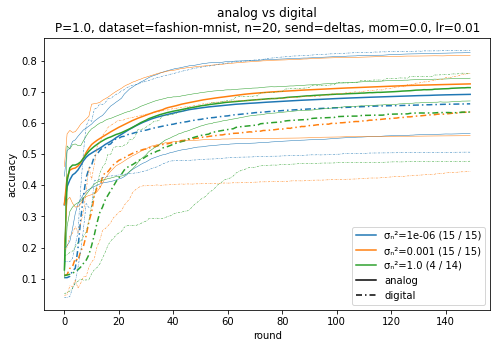

In [13]:
all_specs = get_comparison_args('fashion-mnist', 20)
plot_comparison('accuracy', analog_path, digital_path, *all_specs, plot_range=True)